# 1.2 - Distribuciones Discretas


Una distribución discreta describe la probabilidad de ocurrencia de cada valor de una variable aleatoria discreta. Una variable aleatoria discreta es una variable aleatoria que tiene valores contables, tales como una lista de enteros no negativos. Con una distribución de probabilidad discreta, cada valor posible de la variable aleatoria discreta puede estar asociado con una probabilidad distinta de cero. Por lo tanto, una distribución de probabilidad discreta suele representarse en forma tabular.

### Variables aleatorias

+ Variable aleatoria: Es aquella cuyo valor es el resultado de un evento aleatorio. Lo que quiere decir que son los resultados que se presentan al azar en cualquier evento o experimento.

+ Variable aleatoria discreta: Es aquella que solo toma ciertos valores, frecuentemente enteros, y que resulta principalmente del conteo realizado.

+ Variable aleatoria continua: Es aquella que resulta generalmente de la medición y puede tomar cualquier valor dentro de un intervalo dado.


### Bernoulli

https://es.wikipedia.org/wiki/Distribuci%C3%B3n_Bernoulli

$$X \sim Bernoulli(p)$$

Se basa en el experiemento de Bernoulli. Solo tiene dos posibles resultados, con probabilidad $p$ y $1-p$.

**Ejemplo :** Moneda sesgada.

$\Omega = \{0, 1\}$  Espacio muestral, pensando en cara-cruz.

Llamamos $p$ a la probabilidad de éxito, que salga cara por ejemplo.

In [1]:
p=0.8

$P(X=1)=p=0.8$

$P(X=0)=1-p=0.2$

In [2]:
from scipy.stats import bernoulli

In [3]:
jacob_b=bernoulli(p)

In [6]:
#help(jacob_b)

In [10]:
jacob_b.rvs(size=1)   # rvs=random variable sample , m.a.s.=muestra aleatoria simple

array([1])

In [11]:
muestra=jacob_b.rvs(size=100)

muestra

array([1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1])

In [12]:
sum(muestra)

80

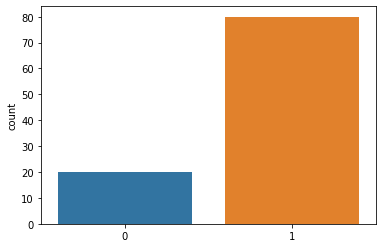

In [13]:
import seaborn as sns

sns.countplot(x=muestra);

### Distribución Binomial

https://es.wikipedia.org/wiki/Distribuci%C3%B3n_binomial


$$X \sim Binomial(N, p)$$

$$P(X=k)={N \choose k} p^{k}(1-p)^{N-k}$$

donde:
${N \choose k} \equiv \frac{N!}{k!(N-k)!}$


La distribución binomial es una distribución de probabilidad discreta que cuenta el número de éxitos en una secuencia de $N$ ensayos de Bernoulli independientes entre sí con una probabilidad fija $p$ de ocurrencia de éxito entre los ensayos.


**Ejemplo :** Lanzamiento de moneda y/o dado.

$N$ es el número de lanzamientos.

$p$ es la probabilidad de éxito, que salga cara por ejemplo.

$\Omega = \{0, 1, 2, 3, ..., N-1, N\}$

In [14]:
from scipy.stats import binom
import pylab as plt


# binom.pmf(k, n, p)  # k=º de exitos, n=nº de repeticiones, p=prob, pmf=probability mass function


# ¿Cuál es la prob de sacar tres caras si tiro 10 veces la moneda?  (moneda ideal)

binom.pmf(3, 10, 0.5)

0.11718750000000004

In [19]:
# ¿Cuál es la prob de sacar cinco doses si tiro 20 veces el dado?  (dado ideal)

binom.pmf(5, 20, 1/6)

0.12941029197899043

0.9999999999999996

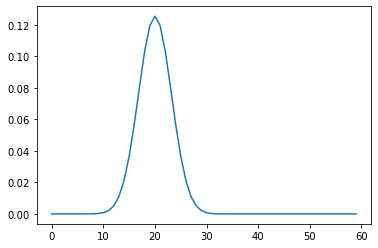

In [22]:
x=[i for i in range(60)]                  # nº de exitos
y=[binom.pmf(x, 40, 0.5) for x in x]      # su probabilidad

plt.plot(x, y);

sum(y)

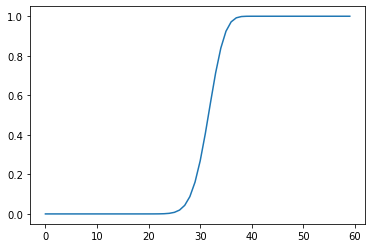

In [24]:
# cdf=cumulative density function

x=[i for i in range(60)]                  # nº de exitos
y=[binom.cdf(x, 40, 0.8) for x in x]      # su probabilidad

plt.plot(x, y);

In [25]:
binom.cdf(4, 10, 0.5)  # por debajo

0.376953125

In [27]:
binom.pmf(0, 10, 0.5)+binom.pmf(1, 10, 0.5)+binom.pmf(2, 10, 0.5)+binom.pmf(3, 10, 0.5)+binom.pmf(4, 10, 0.5)

0.3769531250000001

In [28]:
1 - binom.cdf(4, 10, 0.5)  # por encima

0.623046875

In [29]:
muestra=binom(10, 0.5).rvs(size=500)

muestra[:10]

array([3, 6, 9, 4, 5, 4, 5, 7, 5, 4])

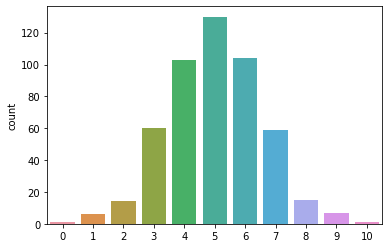

In [30]:
sns.countplot(x=muestra);

**Momentos centrales**

https://es.wikipedia.org/wiki/Momento_central

In [31]:
n=10
p=0.3


media, var, sime, curt = binom.stats(n, p, moments='mvsk')

media, var, sime, curt

(array(3.), array(2.1), array(0.27602622), array(-0.12380952))

**Aclaración:**

 * `.rvs`: Devuelve una muestra aleatoria simple
 * `.pmf`: (probability mass function) Funcion de masa de probabilidad, para distribuciones discretas
 * `.pdf`: (probability density function) Funcion de densidad de probabilidad, para distribuciones continuas
 * `.cdf`: (cumulative mass function) Funcion acumulada de probabilidad, para distribuciones discretas y continuas
 * `.ppf`: (percentile probability function) Inversa de la funcion acumulada, para distribuciones continuas


### Distribución Binomial Negativa

https://es.wikipedia.org/wiki/Distribuci%C3%B3n_binomial_negativa


$$X \sim BN(r, p)$$

$$P(X=k)={r+k-1 \choose k} p^{r}(1-p)^{k}$$


In [32]:
from scipy.stats import nbinom

In [33]:
# ¿Qué prob hay de que la decima tirada corresponda con la tercera cara que sale?

# nbinom.pmf(k, n, p)

nbinom.pmf(3, 10, 0.5)

0.026855468750000024

In [34]:
nbinom.cdf(3, 10, 0.5)

0.046142578125

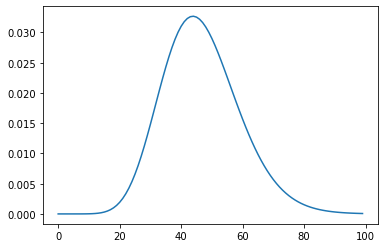

In [42]:
x=[i for i in range(100)]  
y=[nbinom.pmf(x, 20, 0.3) for x in x] 

plt.plot(x, y);

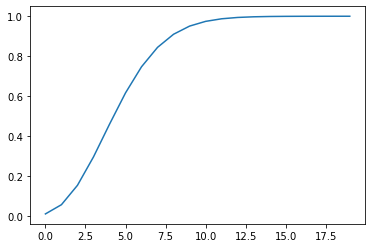

In [36]:
x=[i for i in range(20)]  
y=[nbinom.cdf(x, 20, 0.8) for x in x] 

plt.plot(x, y);

In [48]:
muestra=nbinom(10, 0.5).rvs(size=500)

muestra[:10]

array([ 9, 18,  6, 11,  5, 13,  4,  9, 13, 10])

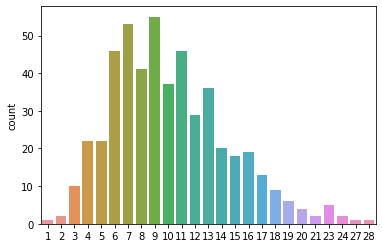

In [49]:
sns.countplot(x=muestra);

In [39]:
n=10
p=0.3


media, var, sime, curt = nbinom.stats(n, p, moments='mvsk')

media, var, sime, curt

(array(23.33333333), array(77.77777778), array(0.6425396), array(0.61285714))

### Distribución Geométrica

https://es.wikipedia.org/wiki/Distribuci%C3%B3n_geom%C3%A9trica


$$X \sim Geom(p)$$

$$P(X=k)= p · (1-p)^{k}$$

para $k = 0, 1, 2, 3, 4...$


La distribución geométrica es un modelo adecuado para aquellos procesos en los que se repiten pruebas hasta la consecución del éxito o resultado deseado y tiene interesantes aplicaciones en los muestreos realizados de esta manera. 

In [50]:
from scipy.stats import geom

In [51]:
# ¿Cuál es la prob de exito en el k-esimo intento?

# geom.pmf(k, p)

geom.pmf(5, 0.5)

0.03125

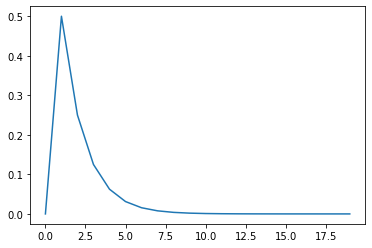

In [52]:
x=[i for i in range(20)]  
y=[geom.pmf(x, 0.5) for x in x] 

plt.plot(x, y);

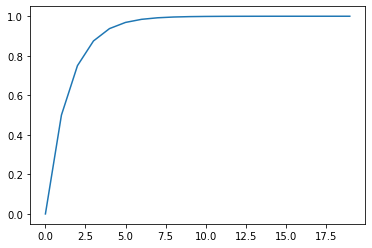

In [53]:
x=[i for i in range(20)]  
y=[geom.cdf(x, 0.5) for x in x] 

plt.plot(x, y);

### Distribución Uniforme Discreta

https://es.wikipedia.org/wiki/Distribuci%C3%B3n_uniforme_discreta

$$X \sim Uniforme(x_{1}, x_{2},..., x_{n})$$

$$P(X=k)= \frac{1}{n}$$

para $k = k_{1}, k_{2},..., k_{n}$

La distribución uniforme discreta es una distribución de probabilidad discreta que surge en espacios de probabilidad equiprobables, es decir, en situaciones donde de $n$ resultados diferentes, todos tienen la misma probabilidad de ocurrir. 

In [54]:
from scipy.stats import randint

randint.pmf([0, 6, 7, 8, 10], 0, 8)   # randint.pmf([elementos], intervalo_a, intervalo_b)

array([0.125, 0.125, 0.125, 0.   , 0.   ])

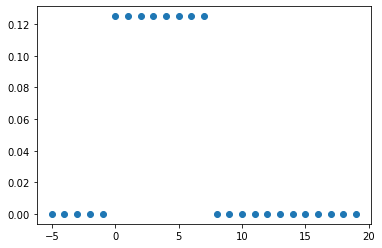

In [55]:
x=[i for i in range(-5, 20)]  
y=[randint.pmf(x, 0, 8) for x in x] 

plt.scatter(x, y);

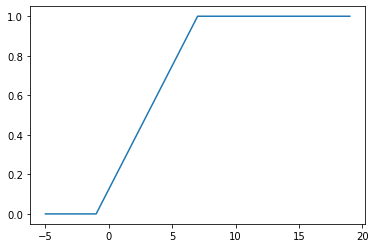

In [56]:
x=[i for i in range(-5, 20)]  
y=[randint.cdf(x, 0, 8) for x in x] 

plt.plot(x, y);

### Distribución de Poisson (ley de sucesos raros)

https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_Poisson


$$X \sim Poisson(\lambda)$$

$$P(X=k)=\frac{\lambda ^{k}e^{-\lambda }}{k!}$$

para $k = 0, 1, 2,..$

La distribución de Poisson es una distribución de probabilidad discreta que expresa, a partir de una frecuencia de ocurrencia media, la probabilidad de que ocurra un determinado número de eventos durante cierto período de tiempo. Concretamente, se especializa en la probabilidad de ocurrencia de sucesos con probabilidades muy pequeñas, o sucesos raros. 

In [57]:
from scipy.stats import poisson

In [58]:
# poisson.pmf(x, lambda), poisson.pmf(evento, media)

poisson.pmf(2, 1.4)   # media del equipode goles es 1.4, ¿prob de marcar 2?

0.24166502466277437

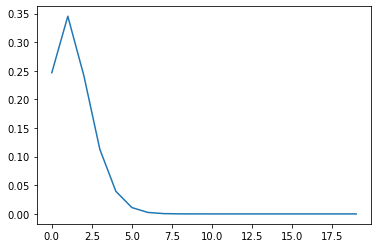

In [59]:
x=[i for i in range(20)]  
y=[poisson.pmf(x, 1.4) for x in x] 

plt.plot(x, y);

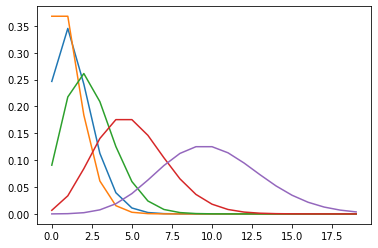

In [60]:
# comparacion con diferentes medias

x=[i for i in range(20)]  
y=[poisson.pmf(x, 1.4) for x in x] 
plt.plot(x, y)

y=[poisson.pmf(x, 1) for x in x] 
plt.plot(x, y)

y=[poisson.pmf(x, 2.4) for x in x] 
plt.plot(x, y)

y=[poisson.pmf(x, 5) for x in x] 
plt.plot(x, y)

y=[poisson.pmf(x, 10) for x in x] 
plt.plot(x, y)
plt.show();

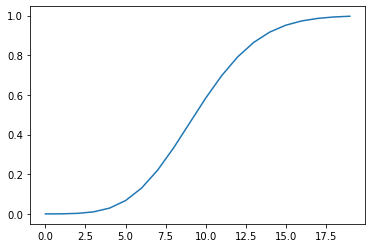

In [62]:
x=[i for i in range(20)]  
y=[poisson.cdf(x, 10) for x in x] 

plt.plot(x, y);

**ejemplo futbol**

Supongamos que los goles de futbol son eventos raros dentro del partido y que siguen una distribución de Poisson. Partiendo de eso, ¿podríamos predecir el resultado de un partido?. Veamoslo.

In [63]:
import numpy as np

In [64]:
equipo_A=2.1     # medias de goles
equipo_B=1.4

In [66]:
A=[poisson.pmf(i, equipo_A) for i in range(10)]

B=[poisson.pmf(i, equipo_B) for i in range(10)]

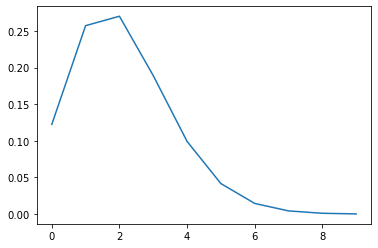

In [69]:
plt.plot([i for i in range(10)], A);  # distribucion de probabilidad de goles para el equipo A

para ver la distribucion del partido se necesita realizar el producto externo de los dos vectores para crear una matriz

In [72]:
partido=np.outer(A, B)

In [73]:
import pandas as pd

pd.DataFrame(partido)

,0,1,2,3,4,5,6,7,8,9
0,0.030197,0.042276,0.029593,0.013810,0.004834,0.001353,3.157948e-04,6.315897e-05,1.105282e-05,1.719327e-06
1,0.063415,0.088780,0.062146,0.029002,0.010151,0.002842,6.631692e-04,1.326338e-04,2.321092e-05,3.610588e-06
2,0.066585,0.093219,0.065254,0.030452,0.010658,0.002984,6.963276e-04,1.392655e-04,2.437147e-05,3.791117e-06
3,0.046610,0.065254,0.045677,0.021316,0.007461,0.002089,4.874293e-04,9.748587e-05,1.706003e-05,2.653782e-06
4,0.024470,0.034258,0.023981,0.011191,0.003917,0.001097,2.559004e-04,5.118008e-05,8.956514e-06,1.393236e-06
5,0.010277,0.014388,0.010072,0.004700,0.001645,0.000461,1.074782e-04,2.149563e-05,3.761736e-06,5.851589e-07
6,0.003597,0.005036,0.003525,0.001645,0.000576,0.000161,3.761736e-05,7.523472e-06,1.316608e-06,2.048056e-07
7,0.001079,0.001511,0.001058,0.000494,0.000173,0.000048,1.128521e-05,2.257042e-06,3.949823e-07,6.144169e-08
8,0.000283,0.000397,0.000278,0.000130,0.000045,0.000013,2.962367e-06,5.924734e-07,1.036828e-07,1.612844e-08
9,0.000066,0.000093,0.000065,0.000030,0.000011,0.000003,6.912190e-07,1.382438e-07,2.419266e-08,3.763303e-09


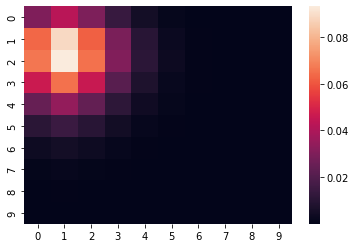

In [74]:
sns.heatmap(partido);

In [75]:
uno=np.sum(np.tril(partido, -1))   # -1 para quitar la diagonal

empate=np.sum(np.diag(partido))   # traza, sumatoria de la diagonal

dos=np.sum(np.triu(partido, 1))   

In [76]:
uno, empate, dos

(0.5360728017016652, 0.2099648137535895, 0.2538908657942761)

In [77]:
uno+empate+dos

0.9999284812495307

![discretas](images/discretas.jpg)